# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education.

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms.
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers,
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn.
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

## Data Overview

- Observations
- Sanity checks

In [ ]:
data = pd.read_csv("/content/ExtraaLearn.csv")
data.info()
data.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
count,4612,4612.000000,4612,4612,4612,4612.000000,4612.000000,4612.000000,4612,4612,4612,4612,4612,4612,4612.000000
unique,4612,NaN,3,2,3,NaN,NaN,NaN,3,2,2,2,2,2,NaN
top,EXT001,NaN,Professional,Website,High,NaN,NaN,NaN,Email Activity,No,No,No,No,No,NaN
freq,1,NaN,2616,2542,2264,NaN,NaN,NaN,2278,4115,4379,4085,3907,4519,NaN
mean,NaN,46.201214,NaN,NaN,NaN,3.566782,724.011275,3.026126,NaN,NaN,NaN,NaN,NaN,NaN,0.298569
std,NaN,13.161454,NaN,NaN,NaN,2.829134,743.828683,1.968125,NaN,NaN,NaN,NaN,NaN,NaN,0.457680
min,NaN,18.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,36.000000,NaN,NaN,NaN,2.000000,148.750000,2.077750,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,51.000000,NaN,NaN,NaN,3.000000,376.000000,2.792000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
75%,NaN,57.000000,NaN,NaN,NaN,5.000000,1336.750000,3.756250,NaN,NaN,NaN,NaN,NaN,NaN,1.000000


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?
3. The company uses multiple modes to interact with prospects. Which way of interaction works best?
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

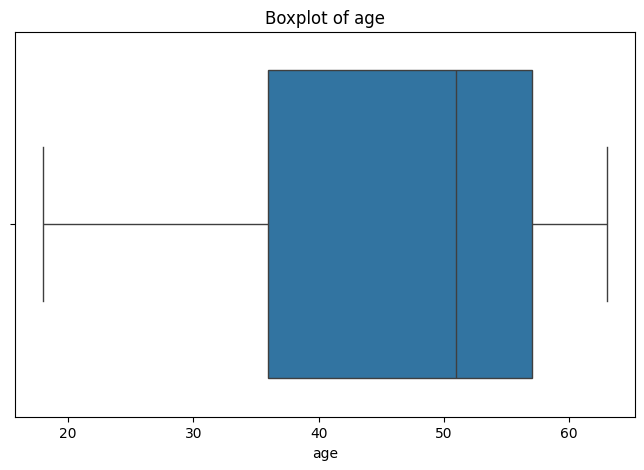

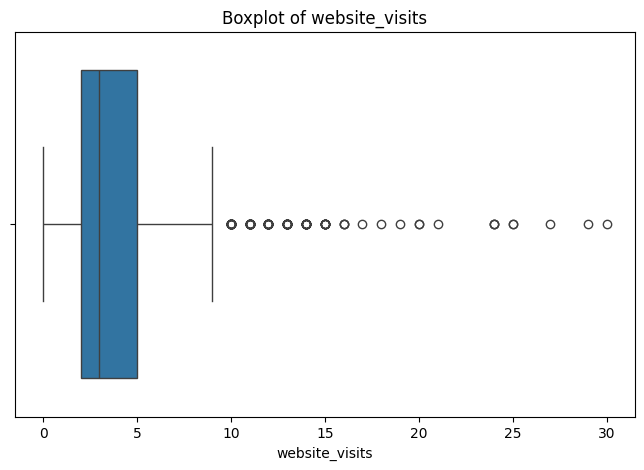

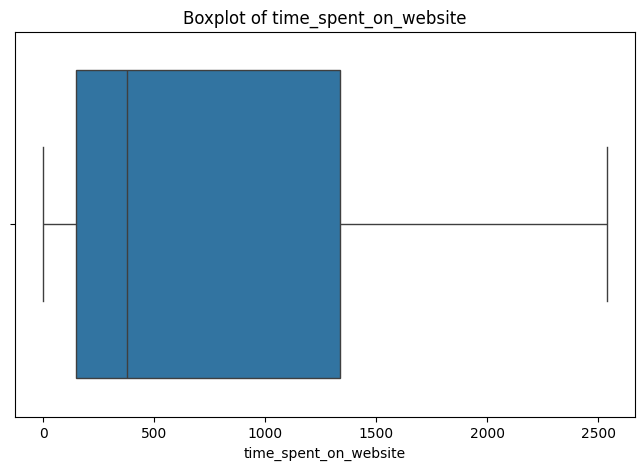

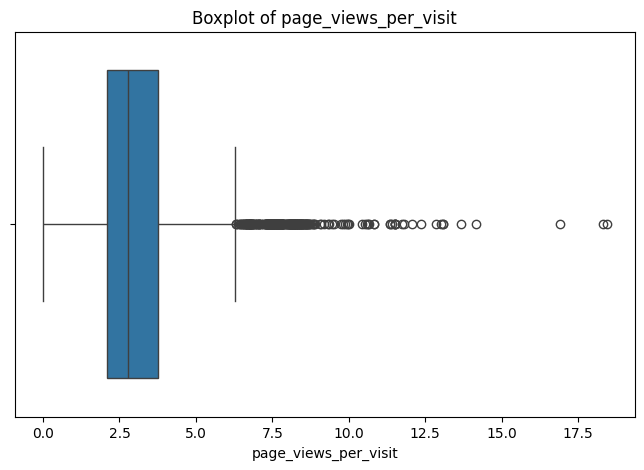

In [ ]:
data = data.drop(columns=['ID'])

# encoding categorical variables
label_encoders = {}
categorical_columns = ["current_occupation", "first_interaction", "profile_completed", "last_activity",
                       "print_media_type1", "print_media_type2", "digital_media", "educational_channels", "referral"]
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Using a boxplot to detect outliers
numeric_columns = ["age", "website_visits", "time_spent_on_website", "page_views_per_visit"]
for col in numeric_columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.show()

# split data into features
X = data.drop(columns=['status'])
y = data['status']

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# standardizing numerical features
scaler = StandardScaler()
X_train[X_train.select_dtypes(include=['int64', 'float64']).columns] = scaler.fit_transform(X_train.select_dtypes(include=['int64', 'float64']))
X_test[X_test.select_dtypes(include=['int64', 'float64']).columns] = scaler.transform(X_test.select_dtypes(include=['int64', 'float64']))


## EDA

- It is a good idea to explore the data once again after manipulating it.

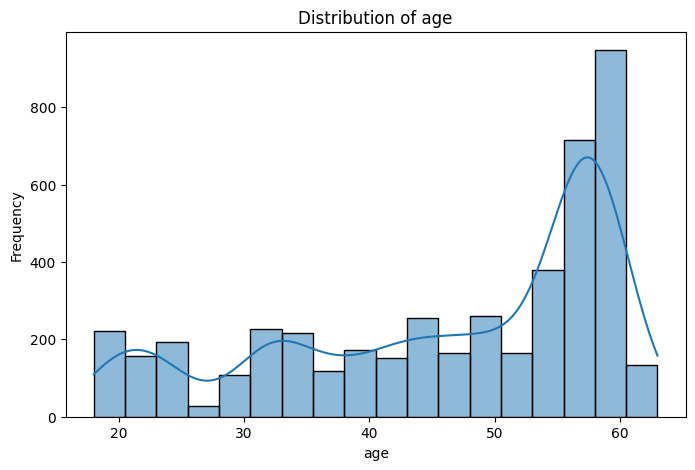

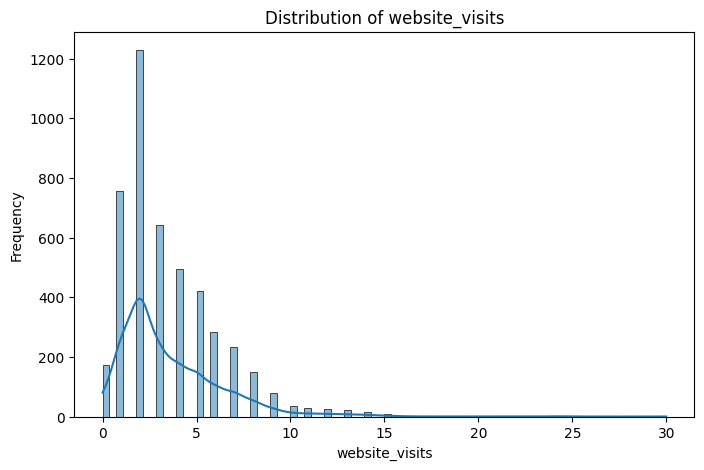

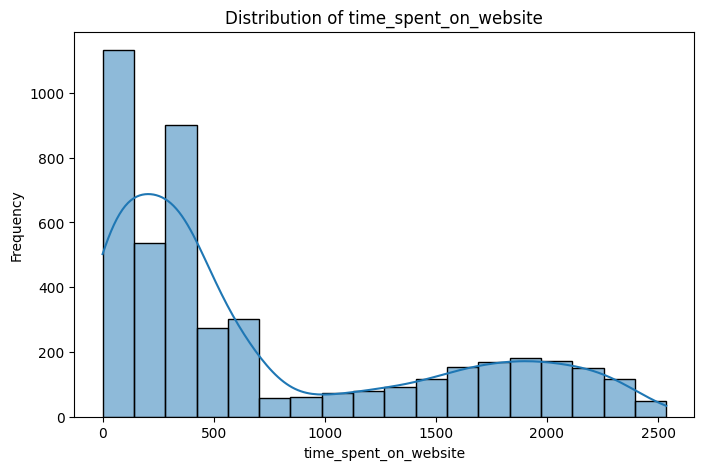

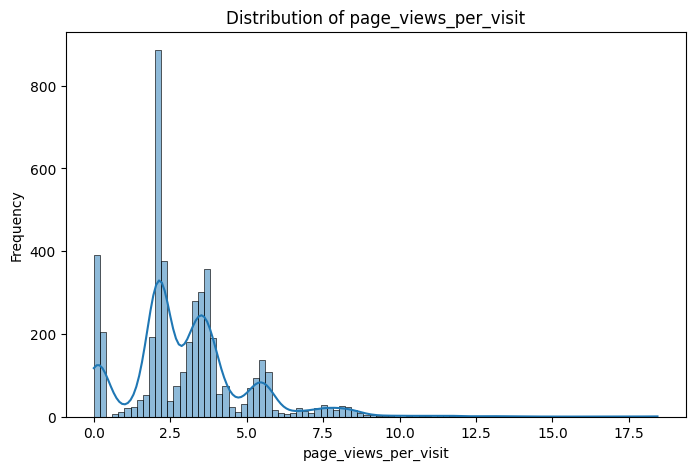

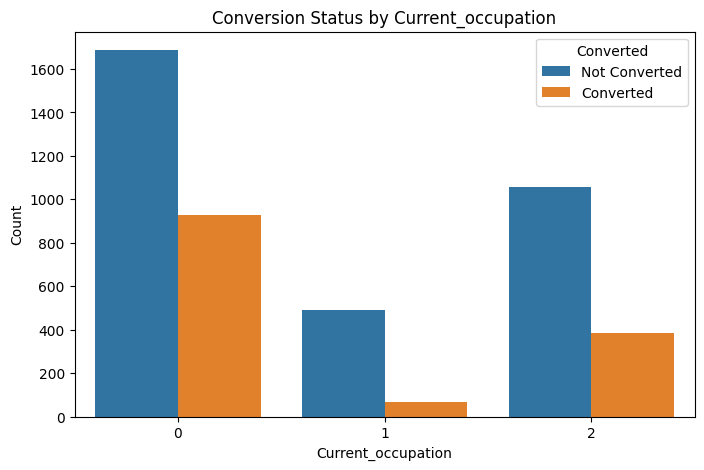

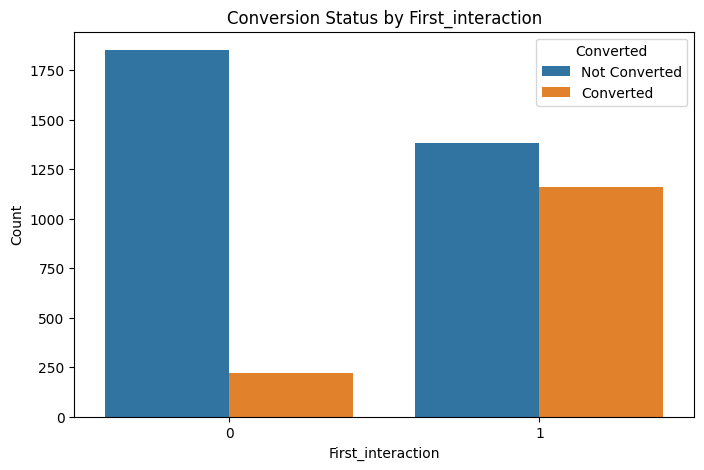

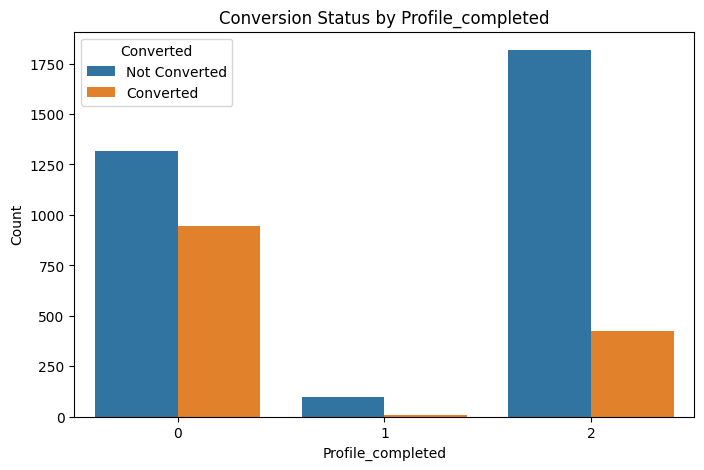

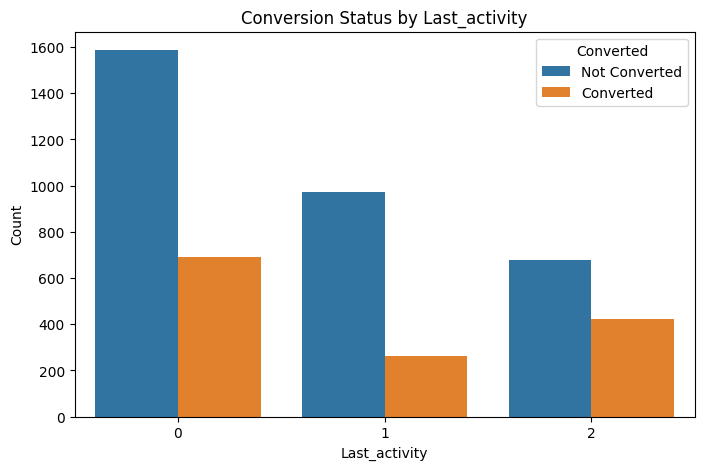

In [ ]:
# univariate analysis
numeric_columns = ["age", "website_visits", "time_spent_on_website", "page_views_per_visit"]
for col in numeric_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(data[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

# bivariate analysis
categorical_columns = ["current_occupation", "first_interaction", "profile_completed", "last_activity"]
for col in categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=col, hue="status", data=data)
    plt.title(f"Conversion Status by {col.capitalize()}")
    plt.xlabel(col.capitalize())
    plt.ylabel("Count")
    plt.legend(title="Converted", labels=["Not Converted", "Converted"])
    plt.show()

## Building a Decision Tree model

In [ ]:

# train model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# predict and evaluate model
y_pred_dt = dt_model.predict(X_test)
print("Decision Tree Model Performance:")
print(classification_report(y_test, y_pred_dt))


Decision Tree Model Performance:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       649
           1       0.72      0.68      0.70       274

    accuracy                           0.83       923
   macro avg       0.79      0.78      0.79       923
weighted avg       0.82      0.83      0.82       923



## Do we need to prune the tree?

In [ ]:

# hyperparameter tuning
param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}
grid_search_dt = GridSearchCV(dt_model, param_grid_dt, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_dt.fit(X_train, y_train)

# evaluate best decision tree model
best_dt_model = grid_search_dt.best_estimator_
y_pred_best_dt = best_dt_model.predict(X_test)
print("Best Decision Tree Model Performance after Pruning:")
print(classification_report(y_test, y_pred_best_dt))


Best Decision Tree Model Performance after Pruning:
              precision    recall  f1-score   support

           0       0.89      0.92      0.91       649
           1       0.80      0.73      0.77       274

    accuracy                           0.87       923
   macro avg       0.85      0.83      0.84       923
weighted avg       0.86      0.87      0.86       923



## Building a Random Forest model

In [ ]:

# train model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# predict and evaluate model
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Model Performance:")
print(classification_report(y_test, y_pred_rf))


Random Forest Model Performance:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       649
           1       0.82      0.69      0.75       274

    accuracy                           0.86       923
   macro avg       0.85      0.82      0.83       923
weighted avg       0.86      0.86      0.86       923



## Do we need to prune the tree?

In [ ]:

# hyperparameter tuning
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 5]
}
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

# evaluate best model
best_rf_model = grid_search_rf.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test)
print("Best Random Forest Model Performance after Pruning:")
print(classification_report(y_test, y_pred_best_rf))


Best Random Forest Model Performance after Pruning:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       649
           1       0.83      0.69      0.75       274

    accuracy                           0.87       923
   macro avg       0.85      0.82      0.83       923
weighted avg       0.86      0.87      0.86       923



## Actionable Insights and Recommendations

# Insights:

Time spent on website:


*   The more time spent on website, the higher chance of converting
*   When engagement exceeds 1000 seconds, there's a significant increase in conversion rates

Profile completion:


*   When leads have a high profile completion percentage, from 75% to 100%, they are much more likely to convert

First Interactions:


*   Interacting through the website convert at a higher rate compared to those on the mobile app

Recent Interactions:


*   Direct engagement (live chat, updating profiles, etc) lead to improved conversion rates

# Recommendations:



*   Implement more personalized content and interactive prompts, to increase time spent on the website. This can be done through FAQs, recommendations, polls, etc
*   Have incentives for those who have complete profiles, such as unlocking specific resources or features at a discounted price
*   Improve the layout of the website, such that it becomes a more enjoyable platform for users
*   Place specific emphasis/priority on those who are directly engaged, such has following up frequently, additional rewards/discounts, etc










